In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import Inception_V3_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model InceptionV3 and set mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).to(device)

#  Reprocess: Center Crop and then resize to 299*299
data_transform = transforms.Compose([
    transforms.CenterCrop(299),
    transforms.Resize(299), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
model.eval() # only use output.logits of Inception's output
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.106, ECE: 0.021
Optimal temperature: 0.968
After temperature - NLL: 1.097, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9392 ± 0.0014
Final Average Prediction Set Size: 113.07 ± 2.86
Final Average Coverage: 0.9497 ± 0.0026
Final Average Real Probability: 0.8889 ± 0.0036


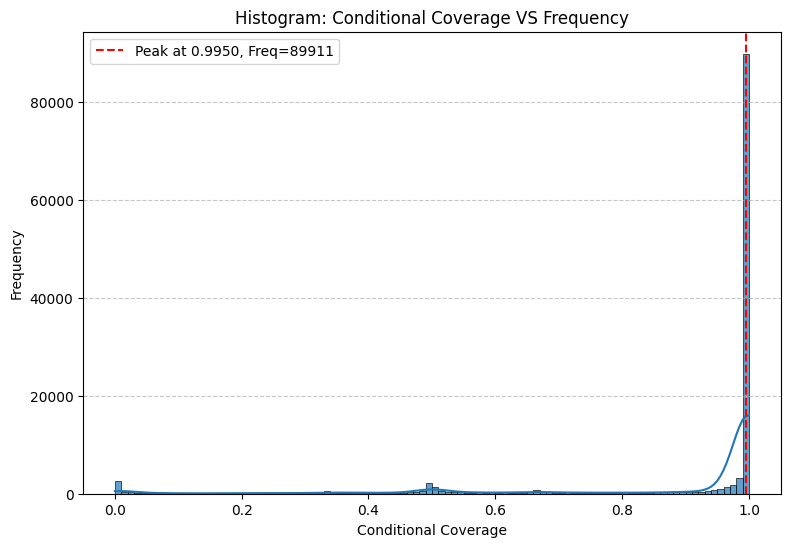

89911 (72.30%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9628 ± 0.0013
Final Average Prediction Set Size: 11.61 ± 0.16
Final Average Coverage: 0.9500 ± 0.0022
Final Average Real Probability: 0.8758 ± 0.0036


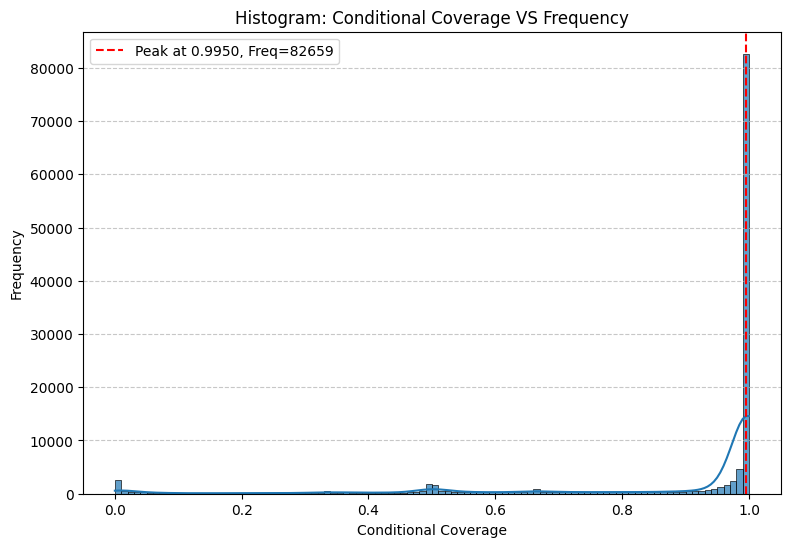

82659 (66.47%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.02, k_reg=15, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 2.1698 ± 0.0380
Final Average Prediction Set Size: 7.99 ± 0.19
Final Average Coverage: 0.9500 ± 0.0015
Final Average Real Probability: 0.8690 ± 0.0029


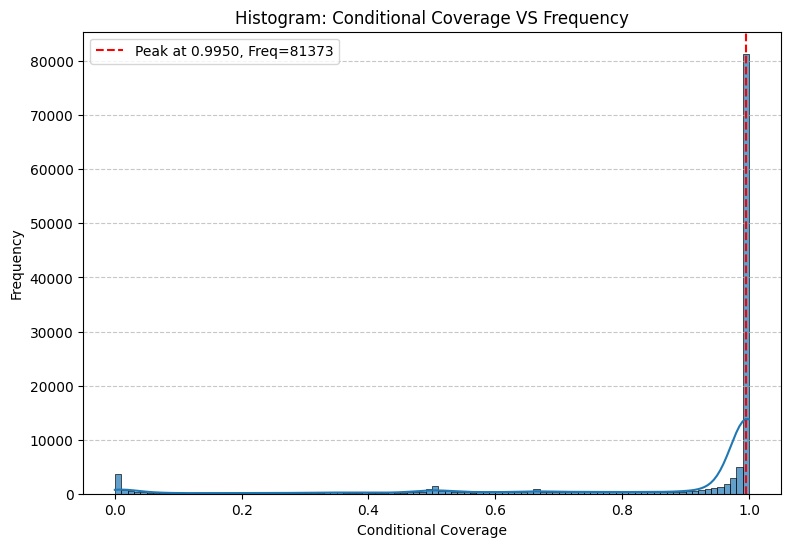

81373 (65.43%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9387 ± 0.0014
Final Average Prediction Set Size: 113.38 ± 2.88
Final Average Coverage: 0.9497 ± 0.0027
Final Average Real Probability: 0.8891 ± 0.0036


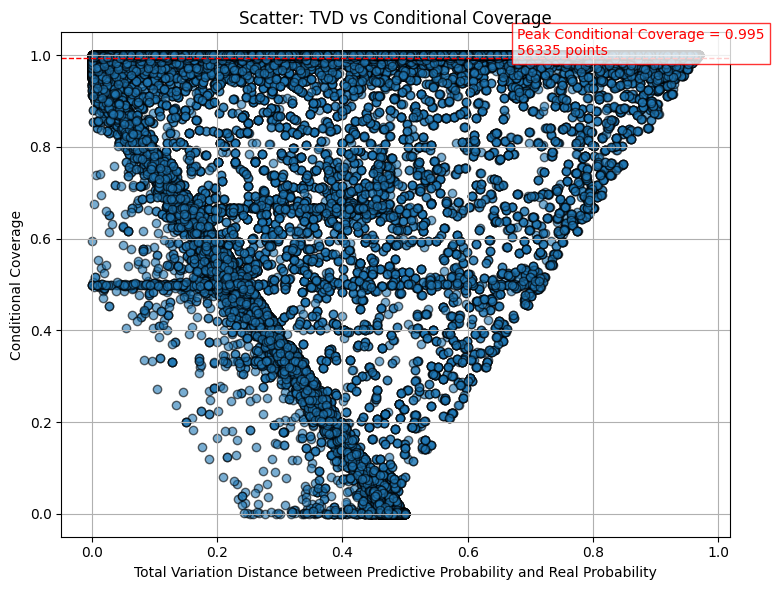

Peak Conditional Coverage = 0.995, with 56335 samples

=== Count Regions Summary ===
39620 (31.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
30707 (24.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
21498 (17.3%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.94200']
  Real Probability Set      : ['0.99456']
Sample 2:
  Predictive Probability Set: ['0.98020']
  Real Probability Set      : ['0.97830']
Sample 3:
  Predictive Probability Set: ['0.94968']
  Real Probability Set      : ['0.97549']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.94951']
  Real Probability Set      : ['0.00126']
Sample 2:
  Predictive Probability Set: ['0.90480', '0.01902', '0.01293']
  Real Probability Set      : ['0.03468', '0.00104', '0.01814']
Sample 3:
  Predictive Probability Set: ['0.89387']
  Real Probability Set      : ['0.02899

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9624 ± 0.0014
Final Average Prediction Set Size: 11.65 ± 0.17
Final Average Coverage: 0.9500 ± 0.0022
Final Average Real Probability: 0.8760 ± 0.0037


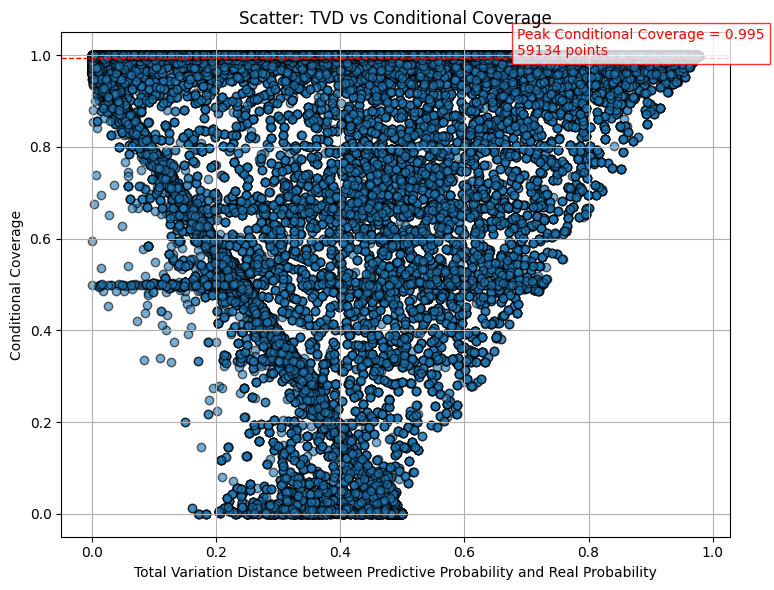

Peak Conditional Coverage = 0.995, with 59134 samples

=== Count Regions Summary ===
46035 (37.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31856 (25.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
24615 (19.8%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.92159', '0.02140', '0.01227', '0.00340', '0.00237', '0.00084', '0.00078', '0.00067']
  Real Probability Set      : ['0.85840', '0.06861', '0.00146', '0.00146', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.97266']
  Real Probability Set      : ['0.99839']
Sample 3:
  Predictive Probability Set: ['0.87832', '0.02047', '0.00958', '0.00722', '0.00576', '0.00228', '0.00196', '0.00149', '0.00109', '0.00058', '0.00053', '0.00053', '0.00049', '0.00047', '0.00035', '0.00034']
  Real Probability Set      : ['0.94647', '0.05143', '0.00105', '0.00105', '0.00000', '0

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.02, k_reg=15, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 2.1687 ± 0.0380
Final Average Prediction Set Size: 7.99 ± 0.19
Final Average Coverage: 0.9500 ± 0.0015
Final Average Real Probability: 0.8689 ± 0.0029


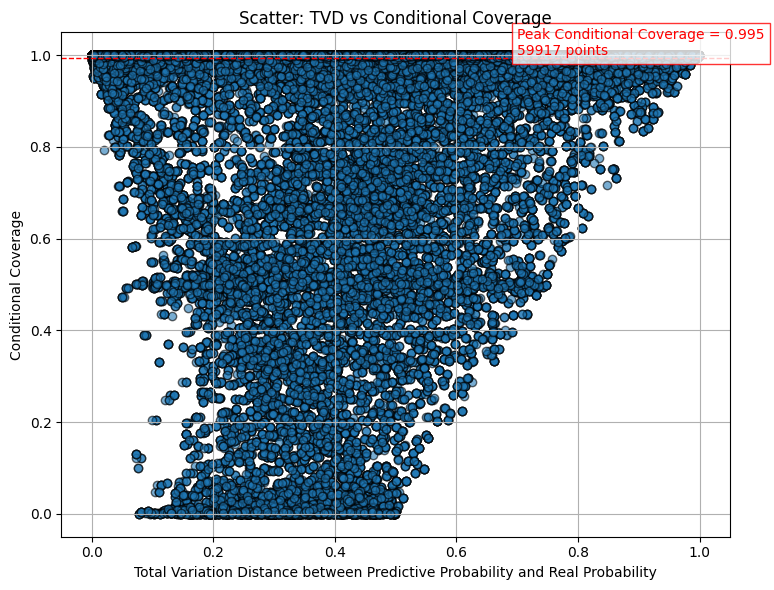

Peak Conditional Coverage = 0.995, with 59917 samples

=== Count Regions Summary ===
50468 (40.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
29576 (23.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
25337 (20.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.77383', '0.05354', '0.04503', '0.01219', '0.00357', '0.00351', '0.00289', '0.00232']
  Real Probability Set      : ['0.84195', '0.04879', '0.10926', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.98107', '0.00176', '0.00017', '0.00015', '0.00012', '0.00010']
  Real Probability Set      : ['0.99907', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.88025', '0.06030', '0.02620', '0.00139', '0.00046', '0.00044', '0.00037']
  Real Probability Set      : ['0.96432', '0.00151', '0.03266', '0.00151', '0

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.05)